In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

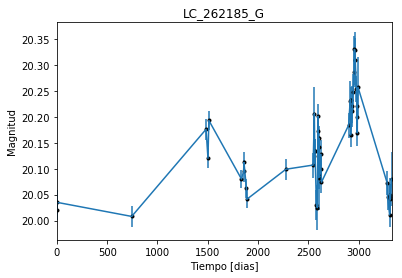

In [2]:
data = np.genfromtxt('LC_262185_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_262185_G')
plt.savefig("LC_262185_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

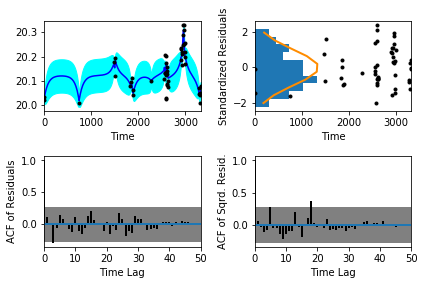

In [5]:
sample.assess_fit()

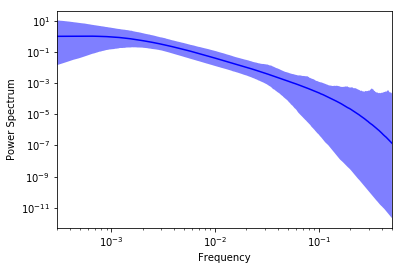

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

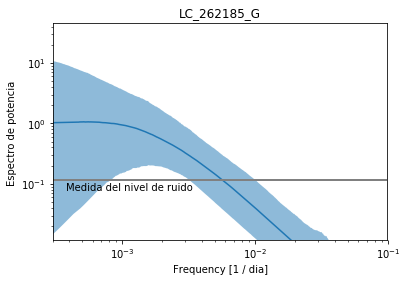

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_262185_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_262185_G')

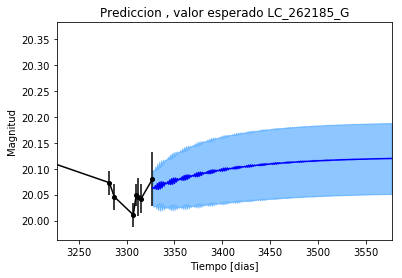

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_262185_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_262185_G')

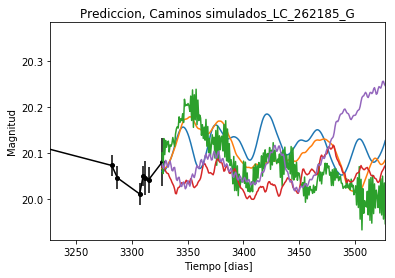

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_262185_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


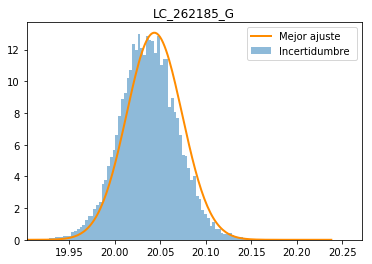

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_262185_G')
plt.savefig("Mejor_ajuste_LC_262185_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_262185_G')

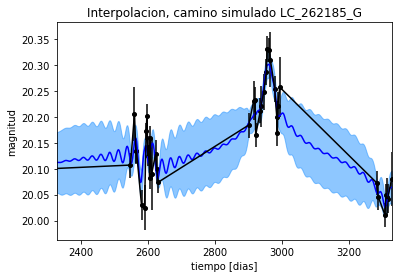

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_G')

Text(0.5,1,'Interpolacion, camino simulado LC_262185_G')

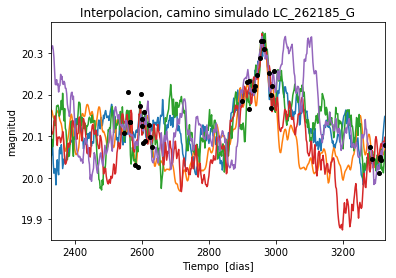

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 903.299344963
Median: 0.0321856889864
Standard deviation: 0.188808743481
68% credibility interval: [ 0.00537558  0.23272287]
95% credibility interval: [ 0.00084846  0.73451203]
99% credibility interval: [  3.62009210e-04   9.36348300e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 592.067744039
Median: 0.0190971389423
Standard deviation: 0.124046477288
68% credibility interval: [ 0.00250424  0.10540838]
95% credibility interval: [ 0.00051115  0.45374606]
99% credibility interval: [  3.26156891e-04   7.81031142e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 559.688501881
Median: 0.126795267701
Standard deviation: 0.

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1302.8950767
Median: 98.5272824763
Standard deviation: 1.79932918381
68% credibility interval: [ 96.4919088   99.95460903]
95% credibility interval: [  93.90930186  100.70231744]
99% credibility interval: [  91.86730964  101.01313511]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1468.85512881
Median: 1.69165419711
Standard deviation: 2.57982135518
68% credibility interval: [ 0.40774264  5.27390506]
95% credibility interval: [ 0.09454771  9.44909899]
99% credibility interval: [  0.05006066  12.39474439]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1364.74189559
Median: 4.04391947651
Standard deviation: 12.2991351468
68% credibility interval: [  0.35873586  19.4094106 ]
95% credibility interval: [  0.04906065 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 46167.1589822
Median: 7.78267324353e-31
Standard deviation: 7.00713178836e+42
68% credibility interval: [  4.75115803e-83   1.75551627e+09]
95% credibility interval: [  2.32802774e-194   6.11856020e+032]
99% credibility interval: [  1.02087873e-218   3.66577794e+040]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1855.3942344
Median: 20.1019863563
Standard deviation: 0.035523992735
68% credibility interval: [ 20.07073506  20.13103318]
95% credibility interval: [ 20.01959242  20.16247346]
99% credibility interval: [ 19.97197376  20.19505456]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1170.41738075
Median: 0.186479342248
Standard deviation: 0.277357755189
68% credibility interval: [ 0.00819884  0.5912418 ]
95% credibility interval: [ 0.          0.92977402]
99% credibility interval: [ 0.          0.98765085]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1170.41738075
Median: 0.186479342248
Standard deviation: 0.277357755189
68% credibility interval: [ 0.00819884  0.5912418 ]
95% credibility interval: [ 0.          0.92977402]
99% credibility interval: [ 0.          0.98765085]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1346.19390422
Median: 0.0
Standard deviation: 0.000718556307205
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1302.8950767
Median: 98.5272824763
Standard deviation: 1.79932918381
68% credibility interval: [ 96.4919088   99.95460903]
95% credibility interval: [  93.90930186  100.70231744]
99% credibility interval: [  91.86730964  101.01313511]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1562.74801064
Median: 0.00755914775713
Standard deviation: 0.00613922882802
68% credibility interval: [ 0.00483733  0.0132557 ]
95% credibility interval: [ 0.00332263  0.02530188]
99% credibility interval: [ 0.00270975  0.03846005]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1761.08200152
Median: 1.08576210904
Standard deviation: 0.215460550887
68% credibility interval: [ 0.89660137  1.32574717]
95% credibility interval: [ 0.75793841  1.59299296]
99% credibility interval: [ 0.68493739  1.78446145]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 523.105785528
Median: 0.0115853916747
Standard deviation: 0.340925580753
68% credibility interval: [  1.39531633e-11   2.01898946e-01]
95% credibility interval: [  7.56364228e-36   1.09349819e+00]
99% credibility interval: [  2.39314349e-42   1.99171684e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 903.299344963
Median: (-0.202228648141-3.35381531469j)
Standard deviation: 2.1081567648
68% credibility interval: [-1.46224091-1.55152329j -0.03377579-0.4423411j ]
95% credibility interval: [-4.61507521+0.j         -0.00533106-1.99778506j]
99% credibility interval: [ -5.88324988e+00+0.j          -2.27457095e-03-3.77933484j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 592.067744039
Median: (-0.119990862811+3.14951686214j)
Standard deviation: 1.90904277415
68% credibility interval: [-0.66230038+3.52852943j -0.01573462+2.95142524j]
95% credibility interval: [-2.85097055+5.75002195j -0.00321167+0.j        ]
99% credibility interval: [ -4.90736339e+00+3.0593489j  -2.04930418e-03+4.8831452j]
Posterior summary for paramet